In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import tqdm
import itertools 
from ipywidgets import widgets
from joblib import Parallel, delayed
import os

In [2]:
df_features_combined = pd.read_pickle('/data/temp/athira/dlc_analysis/feats_combined_glutgaba_dreadds_Feb06.pickle')

In [3]:
df_features_combined.drug.unique()

array(['VGLUTKH.C3.324hm4DcherryCNO', 'KH.C2.526VGAThm4Dcherry',
       'KH.C2.526VGAThm3Dcherry', 'VGLUTKH.C3.324hm4Dcherry',
       'KH.C2.526VGAThm4DcherryCNO', 'KH.C2.526VGAThm3DcherryCNO',
       'DDChM4Dmcherry', 'THhM3Dmcherry', 'VGLUTKH.C3.324hm3Dcherry',
       'THhM4Dmcherry', 'THhM3DmcherryCNO', 'VGLUTKH.C3.324hm3DcherryCNO',
       'THhM4DmcherryCNO', 'DDChM3Dmcherry', 'DDChM3DmcherryCNO',
       'DDChM4DmcherryCNO'], dtype=object)

In [ ]:
# df_features_combined

In [4]:
params_list =  ['curv_neck',
'curv_tail_base',
'curv_tail_pre_mid',
'curv_tail_mid',
'curv_tail_post_mid',
'curv_tail_tip',
'speed_neck',   
'speed_tail_base',   
'speed_tail_pre_mid',
'speed_tail_mid',
'speed_tail_post_mid',
'speed_tail_tip',
'rel_tan_neck',
'rel_tan_tail_base',
'rel_tan_tail_pre_mid',
'rel_tan_tail_mid',
'rel_tan_tail_post_mid',
'rel_tan_tail_tip',
'ects_1',
'ects_2',
'ects_3',
'ects_4',
'ects_5',
'ects_6',
'quirkness']

In [5]:
results_folder_meike = '/data/temp/athira/dlc_analysis/Results/results_dreadds_glutgaba_for_meike/'

# Wild type characterization

In [ ]:
df_features_control = df_features_combined[df_features_combined['drug'] == 'Wildtype'] 

In [ ]:
df_features_control.columns

## Fig1a

In [ ]:
feat_names_dict = {'curv':'Curvature', 'speed': 'Speed', 'rel_tan': 'Relative tangent angles'}
feat_short_dict = {'curv':'c', 'speed':'s', 'rel_tan':'rta', 'ects':'EC' }
df_control_zf_dict = {}

In [ ]:
cpal = sns.color_palette("hls",9)
color_pal = [cpal[0], cpal[3], cpal[4], cpal[5], cpal[6], cpal[7]]
# color_pal_dict = {'neck':cpal[0], 'tail_base':cpal[3], 'tail_pre_mid':cpal[4], 'tail_mid':cpal[5], 'tail_post_mid':cpal[6], 'tail_tip':cpal[7]}

sns.palplot(color_pal)

In [ ]:


for i, feat in tqdm.tqdm(enumerate(['curv', 'speed', 'rel_tan'])):
    
    feat_s = feat_short_dict[feat]
    
    df_feat_control = df_features_control.filter(items = [f"{feat}_neck",f"{feat}_tail_base", f"{feat}_tail_pre_mid",
                                                f"{feat}_tail_mid", f"{feat}_tail_post_mid", f"{feat}_tail_tip"])
    df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
    df_feat_control_zf = df_feat_control_zf.filter(items = [f"{feat}_neck",f"{feat}_tail_base", f"{feat}_tail_pre_mid",
                                                f"{feat}_tail_mid", f"{feat}_tail_post_mid", f"{feat}_tail_tip"])

    col_rename_dict = {f"{feat}_neck" : f"{feat_s}N",
                       f"{feat}_tail_base" :f"{feat_s}TB", 
                       f"{feat}_tail_pre_mid" : f"{feat_s}TprM",      
                       f"{feat}_tail_mid": f"{feat_s}TM", 
                       f"{feat}_tail_post_mid": f"{feat_s}TpoM", 
                       f"{feat}_tail_tip": f"{feat_s}TT"}
    

        
    df_feat_control_zf.rename(columns= col_rename_dict, inplace=True)
    df_control_zf_dict[feat] = df_feat_control_zf

In [ ]:
df_control_zf_dict.keys()

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (24, 10))
for i, feat in tqdm.tqdm(enumerate(['curv', 'speed', 'rel_tan'])):
    
    df_feat_control_zf = df_control_zf_dict[feat]
    if feat == 'curv':
        df_feat_control_zf = df_feat_control_zf * (1/11.56)
    elif feat == 'speed':
        df_feat_control_zf = df_feat_control_zf * (346.80)
    sns.boxplot(data = df_feat_control_zf, ax=axes[i], palette= color_pal, showfliers = False)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=30, size = 'x-large')
    axes[i].set_ylabel(feat_names_dict[feat], size = 'xx-large')
    plt.setp(axes[i].collections, alpha=.5)

In [ ]:
fig.savefig(os.path.join(results_folder_meike,'fig1a_Wildtype.png'))

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (24, 10))
for i, feat in tqdm.tqdm(enumerate(['curv', 'speed', 'rel_tan'])):
    
    df_feat_control_zf = df_control_zf_dict[feat]
    if feat == 'curv':
        df_feat_control_zf = df_feat_control_zf * (1/11.56)
        df_feat_control_zf[df_feat_control_zf.abs() > 5] = 0
    elif feat == 'speed':
        df_feat_control_zf = df_feat_control_zf * (346.80)
        df_feat_control_zf[df_feat_control_zf.abs() > 5000] = 0
    sns.violinplot(data = df_feat_control_zf, ax=axes[i], palette= color_pal, alpha = 0.1)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=30, size = 'x-large')
    axes[i].set_ylabel(feat_names_dict[feat], size = 'xx-large')
    plt.setp(axes[i].collections, alpha=.5)

## Playing with quartiles

In [ ]:

Q1 = df_features_control.quantile(0.25, axis =0)
Q3 = df_features_control.quantile(0.75, axis =0)
    
IQR = Q3 - Q1
IQR

# df_melted_wo_out = 

In [ ]:
df_low_thresh = Q1 - 1.5 * IQR
df_high_thresh = Q3 + 1.5 * IQR

In [ ]:
df_low_thresh.filter(like='ects_')

In [ ]:
df_feat_control = df_features_control.filter(like='ects_')

In [ ]:
df_feat_control_woo = df_feat_control[(df_feat_control > df_low_thresh.filter(like='ects_'))&
                                      (df_feat_control < df_high_thresh.filter(like='ects_'))]

In [ ]:
df_melted = pd.melt(df_feat_control_woo, var_name= 'coeff', value_name= 'ects')

In [ ]:
df_melted

In [ ]:
df_melted.dropna(inplace=True)

In [ ]:
df_melted.min()

In [ ]:
fig2, ax2 = plt.subplots(1,1, figsize = (15, 10))
sns.violinplot(data = df_melted, x = 'coeff', y= 'ects', ax=ax2, palette=sns.color_palette('Set2',6), cut=0)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, size = 'x-large')
ax2.set_ylabel('Eigen cofficient value', size = 'xx-large')
ax2.set_xlabel('Coefficient', size = 'xx-large')
plt.setp(ax2.collections, alpha=.8)

## Fig 1b

In [ ]:
col_rename_dict2 = {}

for item in df_feat_control_zf.keys():
    num = item.split('_')[1]
    col_rename_dict2[item] = f'EC{num}'


In [ ]:
df_feat_control = df_features_control.filter(like='ects_')
df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
df_feat_control_zf = df_feat_control_zf.filter(like='ects_')
df_feat_control_zf.rename(columns=col_rename_dict2, inplace=True)

df_melted = pd.melt(df_feat_control_zf, var_name= 'coeff', value_name= 'ects')
# with sns.axes_style("darkgrid"):

In [ ]:
fig2, ax2 = plt.subplots(1,1, figsize = (15, 10))
sns.boxplot(data = df_melted, x = 'coeff', y= 'ects', ax=ax2, palette=sns.color_palette('Set2',6), 
            showfliers=False)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, size = 'x-large')
ax2.set_ylabel('Eigen cofficient value', size = 'xx-large')
ax2.set_xlabel('Coefficient', size = 'xx-large')
plt.setp(ax2.collections, alpha=.8)

In [ ]:
fig2.savefig(os.path.join(results_folder_meike,'fig1b_Wildtype.png'))

In [ ]:
# fig2, ax2 = plt.subplots(1,1, figsize = (15, 10))
# sns.violinplot(data = df_melted, x = 'coeff', y= 'ects', ax=ax2, palette=sns.color_palette('Set2',6))
# ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30, size = 'x-large')
# ax2.set_ylabel('Eigen cofficient value', size = 'xx-large')
# ax2.set_xlabel('Coefficient', size = 'xx-large')
# plt.setp(ax2.collections, alpha=.8)

## Quirkiness

In [ ]:
corn_b = sns.color_palette("tab10",9)[0]
df_feat_control = df_features_control.filter(like='quirkness')
# df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
df_feat_control_zf = df_feat_control

with sns.axes_style("darkgrid"):
    fig3, ax3 = plt.subplots(1,1, figsize = (5, 10))
    sns.boxplot(data = df_feat_control_zf, color= corn_b, showfliers= False ,ax = ax3 )
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
    ax3.set_ylabel('Quirkiness', size = 'xx-large')
    ax3.axes.xaxis.set_visible(False)

In [ ]:
fig3.savefig(os.path.join('/data/temp/athira/dlc_analysis/Results/results_Meike/fig1c_Wildtype.png'))

In [ ]:
# corn_b = sns.color_palette("tab10",9)[0]
# df_feat_control = df_features_control.filter(like='quirkness')
# df_feat_control_zf = df_features_control[(np.abs(stats.zscore(df_feat_control, nan_policy='omit')) < 3).all(axis=1)] 
# df_feat_control_zf = df_feat_control_zf.filter(like='quirkness')

with sns.axes_style("darkgrid"):
    fig4, ax3 = plt.subplots(1,1, figsize = (8, 10))
    sns.violinplot(data = df_feat_control_zf, color= corn_b, alpha = 0.5, ax = ax3 )
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=30)
    ax3.set_ylabel('Quirkiness', size = 'xx-large')
    ax3.axes.xaxis.set_visible(False)

In [ ]:
fig4.savefig(os.path.join(results_folder_meike,'fig1c_violin_Wildtype.png'))

# Dreadds : w/ CNO vs w/o CNO 

In [6]:
df_features_combined.columns

Index(['curv_head', 'speed_head', 'tan_head', 'curv_neck', 'speed_neck',
       'tan_neck', 'curv_tail_base', 'speed_tail_base', 'tan_tail_base',
       'curv_tail_pre_mid', 'speed_tail_pre_mid', 'tan_tail_pre_mid',
       'curv_tail_mid', 'speed_tail_mid', 'tan_tail_mid', 'curv_tail_post_mid',
       'speed_tail_post_mid', 'tan_tail_post_mid', 'curv_tail_tip',
       'speed_tail_tip', 'tan_tail_tip', 'rel_tan_neck', 'rel_tan_tail_base',
       'rel_tan_tail_pre_mid', 'rel_tan_tail_mid', 'rel_tan_tail_post_mid',
       'rel_tan_tail_tip', 'ects_1', 'ects_2', 'ects_3', 'ects_4', 'ects_5',
       'ects_6', 'quirkness', 'frames', 'filename', 'filedir', 'drug'],
      dtype='object')

## SMD 

In [7]:
dreadds_list = list(df_features_combined.drug.unique())
dreadds_list

['VGLUTKH.C3.324hm4DcherryCNO',
 'KH.C2.526VGAThm4Dcherry',
 'KH.C2.526VGAThm3Dcherry',
 'VGLUTKH.C3.324hm4Dcherry',
 'KH.C2.526VGAThm4DcherryCNO',
 'KH.C2.526VGAThm3DcherryCNO',
 'DDChM4Dmcherry',
 'THhM3Dmcherry',
 'VGLUTKH.C3.324hm3Dcherry',
 'THhM4Dmcherry',
 'THhM3DmcherryCNO',
 'VGLUTKH.C3.324hm3DcherryCNO',
 'THhM4DmcherryCNO',
 'DDChM3Dmcherry',
 'DDChM3DmcherryCNO',
 'DDChM4DmcherryCNO']

In [8]:
dreadds_control = sorted([d for d in dreadds_list if 'CNO' not in d])
dreadds_control

['DDChM3Dmcherry',
 'DDChM4Dmcherry',
 'KH.C2.526VGAThm3Dcherry',
 'KH.C2.526VGAThm4Dcherry',
 'THhM3Dmcherry',
 'THhM4Dmcherry',
 'VGLUTKH.C3.324hm3Dcherry',
 'VGLUTKH.C3.324hm4Dcherry']

In [9]:
dreadds_cno = sorted([d for d in dreadds_list if 'CNO' in d])
dreadds_cno

['DDChM3DmcherryCNO',
 'DDChM4DmcherryCNO',
 'KH.C2.526VGAThm3DcherryCNO',
 'KH.C2.526VGAThm4DcherryCNO',
 'THhM3DmcherryCNO',
 'THhM4DmcherryCNO',
 'VGLUTKH.C3.324hm3DcherryCNO',
 'VGLUTKH.C3.324hm4DcherryCNO']

In [10]:
df_medians = df_features_combined.groupby(by='drug', as_index=True)[params_list].median()

In [11]:
df_mad = df_features_combined.groupby(by='drug', as_index=True)[params_list].mad()

In [12]:
list_smd_dicts = []
for param in sorted(params_list):
    
    smd_dict = {}
    smd_dict['param'] = param
    
    
    for control in dreadds_control:
        
        dreadd_cno = f'{control}CNO'

        control_median = df_medians.loc[control][param]
        control_mad = df_mad.loc[control][param]

        dreadd_median = df_medians.loc[dreadd_cno][param]
        dreadd_mad = df_mad.loc[dreadd_cno][param]

        smd_dict[control] = (dreadd_median - control_median) / (dreadd_mad + control_mad)
        
    list_smd_dicts.append(smd_dict)

In [13]:
smd_df  = pd.DataFrame(list_smd_dicts).set_index('param')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

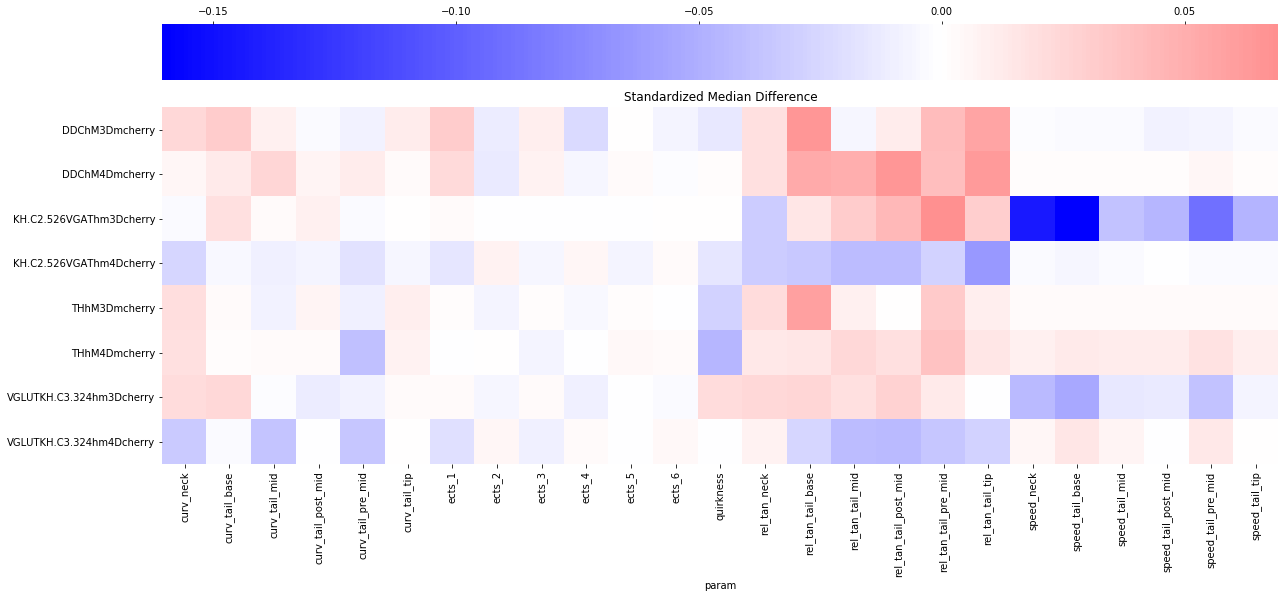

In [15]:

fig, axes = plt.subplots(1,1, figsize = (20, 10))
sns.heatmap(smd_df.loc[sorted(params_list)][dreadds_control].T, cmap= 'bwr', 
            square=True, ax=axes, center=0, cbar = True, cbar_kws = dict(use_gridspec=False,location="top"))
axes.set_title('Standardized Median Difference')
fig.savefig(os.path.join(results_folder_meike, 'smd.png'))

In [ ]:
fig_cluster = sns.clustermap(smd_df.loc[sorted(params_list)][drugs_wo_control].T, cmap= 'bwr', col_cluster=False)
plt.savefig('')

In [ ]:
# Curvatures (Postures-2)
sns.clustermap(smd_df.loc[['curv_neck','curv_tail_base','curv_tail_pre_mid','curv_tail_mid','curv_tail_post_mid','curv_tail_tip']][drugs_wo_control].T, 
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

In [ ]:
# Ects & Quirkiness (Postures-1)
sns.clustermap(smd_df.loc[['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6', 'quirkness']][drugs_wo_control].T, 
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

In [ ]:
# Speeds
sns.clustermap(smd_df.loc[['speed_neck','speed_tail_base','speed_tail_pre_mid','speed_tail_mid','speed_tail_post_mid','speed_tail_tip']][drugs_wo_control].T,
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

In [ ]:
# rel_tans
sns.clustermap(smd_df.loc[['rel_tan_neck','rel_tan_tail_base','rel_tan_tail_pre_mid','rel_tan_tail_mid','rel_tan_tail_post_mid','rel_tan_tail_tip']][drugs_wo_control].T,
               cmap= 'bwr', col_cluster=False, figsize = (5,8))
axes.set_title('Standardized Median Difference')

## Stat tests

In [16]:
from scipy.stats import mannwhitneyu

In [17]:
len(dreadds_control)

8

In [18]:
def test_dreadds_mannwhitney(control, params_list, _tail):
    
    pvalues_dict = {}
#     pvalues_dict['control'] = control
    
    dreadd_cno = f'{control}CNO'
    pvalues_dict['dreadd'] = dreadd_cno
    
    for param in params_list:
        
        results = mannwhitneyu(*[df_features_combined[param][df_features_combined["drug"] == group].values 
                         for group in [control,dreadd_cno]], alternative= _tail)
        
        pvalues_dict[param] = results[-1]
        
        
    return pvalues_dict

In [19]:
dict_test = test_dreadds_mannwhitney(dreadds_control[0], params_list,'two-sided')

In [20]:
dict_test

{'dreadd': 'DDChM3DmcherryCNO',
 'curv_neck': 0.0,
 'curv_tail_base': 0.0,
 'curv_tail_pre_mid': 1.6004927697816167e-09,
 'curv_tail_mid': 2.295806389862805e-105,
 'curv_tail_post_mid': 0.0,
 'curv_tail_tip': 0.0,
 'speed_neck': 0.0,
 'speed_tail_base': 0.0,
 'speed_tail_pre_mid': 0.0,
 'speed_tail_mid': 0.0,
 'speed_tail_post_mid': 0.0,
 'speed_tail_tip': 0.0,
 'rel_tan_neck': 0.0,
 'rel_tan_tail_base': 0.0,
 'rel_tan_tail_pre_mid': 0.0,
 'rel_tan_tail_mid': 0.0,
 'rel_tan_tail_post_mid': 0.24073518501514424,
 'rel_tan_tail_tip': 0.0,
 'ects_1': 0.0,
 'ects_2': 0.0,
 'ects_3': 0.0,
 'ects_4': 0.0,
 'ects_5': 3.7817628781667994e-69,
 'ects_6': 0.0,
 'quirkness': 0.0}

#### Two-tailed

In [21]:
mannwhitney_combo_list = Parallel(n_jobs=len(dreadds_control), verbose = 5)(delayed(test_dreadds_mannwhitney)(dreadd, params_list,'two-sided') 
                                                          for dreadd in dreadds_control)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:  2.1min remaining:  3.5min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  2.4min remaining:  1.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.6min finished


In [23]:
df_pval_mannwhitney = pd.DataFrame(mannwhitney_combo_list)
# df_pval_mannwhitney.drop(['control'], axis=1, inplace=True)
df_pval_mannwhitney.set_index('dreadd', inplace = True)

# Bonferroni correction
bf_corr_pvalue = 0.05/len(df_pval_mannwhitney.index) 
df_binary_bf = df_pval_mannwhitney > bf_corr_pvalue



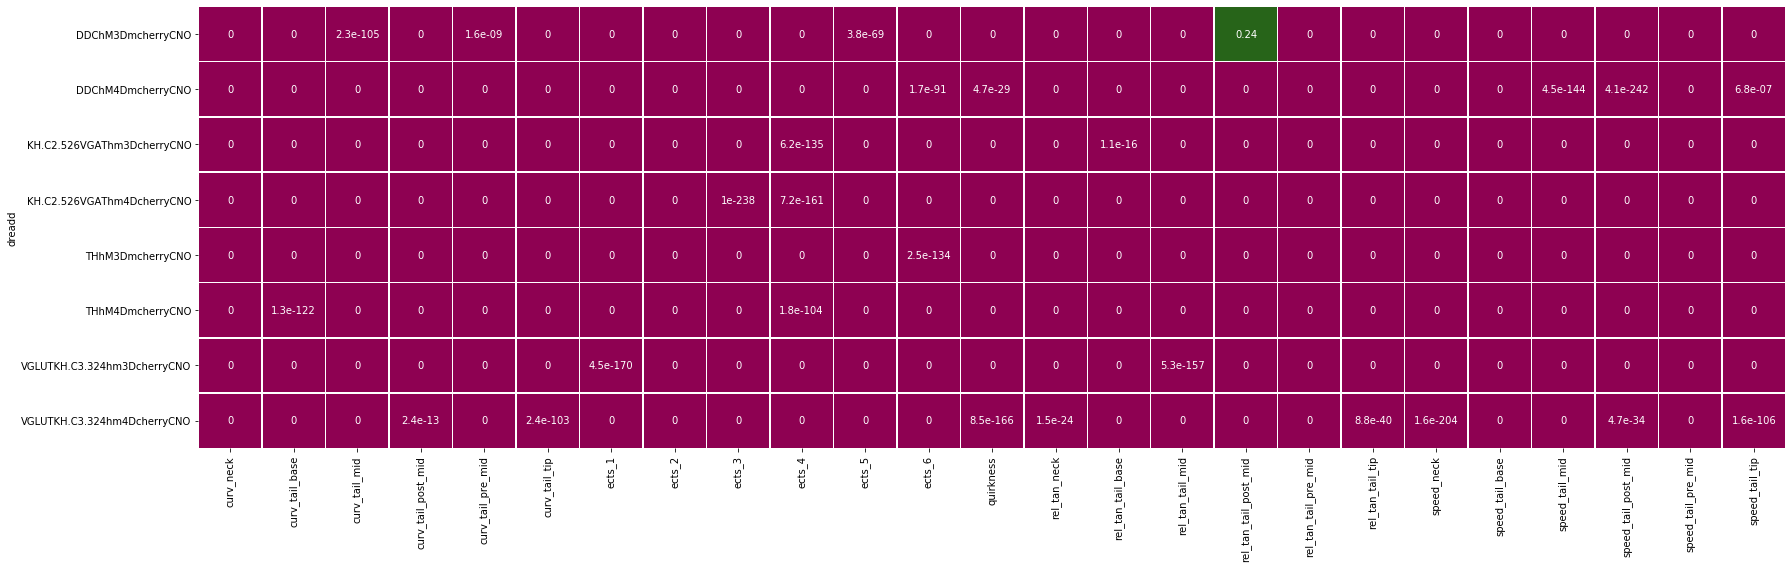

In [24]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_binary_bf.loc[dreadds_cno][sorted(params_list)] , cmap = 'PiYG', linewidths=.5,
            annot = df_pval_mannwhitney.loc[dreadds_cno][sorted(params_list)], ax= axes, cbar = False)
plt.tight_layout()

#### Less

In [25]:
mwu_combo_list_less = Parallel(n_jobs=len(dreadds_control), verbose = 5)(delayed(test_dreadds_mannwhitney)(dreadd, params_list, 'less') 
                                                          for dreadd in dreadds_control)

df_pval_mwu_less = pd.DataFrame(mwu_combo_list_less)
# df_pval_mwu_less.drop(['control'], axis=1, inplace=True)
df_pval_mwu_less.set_index('dreadd', inplace = True)
df_binary_bf_less = df_pval_mwu_less > bf_corr_pvalue

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:  2.1min remaining:  3.5min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  2.3min remaining:  1.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.5min finished


In [ ]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_binary_bf_less.loc[dreadds_cno][sorted(params_list)] , cmap = 'PiYG', linewidths=.5,
            annot = df_pval_mwu_less.loc[dreadds_cno][sorted(params_list)], ax= axes, cbar = False)
plt.tight_layout()

In [ ]:
sns.clustermap(df_binary_bf_less.loc[sorted(dreadds_cno)][params_list].T, cmap= 'bwr', row_cluster=False)
axes.set_title('Clustermap using significance trends')

#### Greater 

In [26]:
mwu_combo_list_greater = Parallel(n_jobs=len(dreadds_control), verbose = 5)(delayed(test_dreadds_mannwhitney)(dreadd, params_list, 'greater') 
                                                          for dreadd in dreadds_control)
df_pval_mwu_greater = pd.DataFrame(mwu_combo_list_greater)
# df_pval_mwu_greater.drop(['control'], axis=1, inplace=True)
df_pval_mwu_greater.set_index('dreadd', inplace = True)
df_binary_bf_greater = df_pval_mwu_greater > bf_corr_pvalue

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:  2.1min remaining:  3.5min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  2.3min remaining:  1.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.5min finished


In [ ]:
fig, axes = plt.subplots(1,1, figsize = (25, 8))
sns.heatmap(df_binary_bf_greater.loc[dreadds_cno][sorted(params_list)] , cmap = 'PiYG', linewidths=.5,
            annot = df_pval_mwu_greater.loc[dreadds_cno][sorted(params_list)], ax= axes, cbar = False)
plt.tight_layout()

#### Save test data 

In [27]:
results_folder_meike

'/data/temp/athira/dlc_analysis/Results/results_dreadds_glutgaba_for_meike/'

In [29]:
writer = pd.ExcelWriter(os.path.join(results_folder_meike,'stats_data/pvalues_mannwhitneyu_dreadds_all.xlsx'), 
                        engine='openpyxl')

# Write each dataframe to a different worksheet.
df_pval_mannwhitney.to_excel(writer, sheet_name='Two_tailed')
df_pval_mwu_less.to_excel(writer, sheet_name='Less')
df_pval_mwu_greater.to_excel(writer, sheet_name='Greater')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [30]:
df_pval_mannwhitney.to_pickle(os.path.join(results_folder_meike,'stats_data/mwu_pval_dreadds_twosided.pickle'))
df_pval_mwu_less.to_pickle(os.path.join(results_folder_meike,'stats_data/mwu_pval_dreadds_less.pickle'))
df_pval_mwu_greater.to_pickle(os.path.join(results_folder_meike,'stats_data/mwu_pval_dreadds_greater.pickle'))

In [ ]:
# df_binary_bf.to_pickle('./Results_30072021/drugs_pvals_all_for_figures/mwu_test_drugs_twosided.pickle')
# df_binary_bf_less.to_pickle('./Results_30072021/drugs_pvals_all_for_figures/mwu_test_drugs_less.pickle')
# df_binary_bf_greater.to_pickle('./Results_30072021/drugs_pvals_all_for_figures/mwu_test_drugs_greater.pickle')

## Violin plots

In [ ]:
# Q1 = df_features_combined.groupby('drug').quantile(0.25)
# Q3 = df_features_combined.groupby('drug').quantile(0.75)
    
# IQR = Q3 - Q1
# df_low_thresh = Q1 - 1.5 * IQR
# df_high_thresh = Q3 + 1.5 * IQR

In [ ]:
# df_feat_control_woo = df_feat_control[(df_feat_control > df_low_thresh.filter(like='ects_'))&
#                                       (df_feat_control < df_high_thresh.filter(like='ects_'))]

In [31]:
def make_a_melted_df(main_df, param, dreadd_list):
    
    list_to_melt = []
    params_df = main_df.filter(items=['drug', param, f'{param}_zscore'])
    
    for dreadd in dreadd_list:
        
        control = dreadd.split('CN')[0]
        
        # Select only those rows which are relevant to the particular dreadd 
        dreadd_df = params_df[(params_df['drug']==control)|(params_df['drug']==dreadd)]
        
        # Select those rows which have an acceptable zscore
#         dreadd_df = dreadd_df[dreadd_df[f'{param}_zscore'] < 3]
#         dreadd_df.drop(columns=f'{param}_zscore', inplace=True)
        
        # Append a column as dreadd_screened
        dreadd_df['test_dreadd'] = dreadd.split('CN')[0]
        # Rename the dreadd column
        dreadd_df['type']= dreadd_df.drug.apply(lambda x: 'w/ CNO' if x==dreadd else 'w/o CNO')
        
        list_to_melt.append(dreadd_df)
    
    melted_param_df = pd.concat(list_to_melt)
    return melted_param_df      


In [32]:
dict_featnames = {'curv_neck':'cN',
 'curv_tail_base':'cTB',
 'curv_tail_pre_mid':'cTprM',
 'curv_tail_mid':'cTM',
 'curv_tail_post_mid':'cTpoM',
 'curv_tail_tip':'cTT',
 'speed_neck':'sN',
 'speed_tail_base':'sTB',
 'speed_tail_pre_mid':'sTprM',
 'speed_tail_mid':'sTM',
 'speed_tail_post_mid':'sTpoM',
 'speed_tail_tip':'sTT',
 'rel_tan_neck':'rtaN',
 'rel_tan_tail_base':'rtaTB',
 'rel_tan_tail_pre_mid':'rtaTprM',
 'rel_tan_tail_mid':'rtaTM',
 'rel_tan_tail_post_mid':'rtaTpoM',
 'rel_tan_tail_tip':'rtaTT',
 'ects_1':'EC1',
 'ects_2':'EC1',
 'ects_3':'EC1',
 'ects_4':'EC1',
 'ects_5':'EC1',
 'ects_6':'EC1',
 'quirkness':'Quirkiness'}

In [33]:
def plot_comparitive_violins(param):
    
    violin_height = 5
        
    list_dreadds = []
    dict_dreadds = {}

    list_dreadds1 = list(df_binary_bf.index[(~df_binary_bf[param]==True)&
                                     (~df_binary_bf_less[param]==True)&
                                     (~df_binary_bf_greater[param]==False)].values)
    if list_dreadds1:
        list_dreadds.extend(list_dreadds1)
        dict_dreadds['g'] = list_dreadds1

    list_dreadds2 = list(df_binary_bf.index[(~df_binary_bf[param]==True)&
                                     (~df_binary_bf_greater[param]==True)&
                                     (~df_binary_bf_less[param]==False)].values)
    if list_dreadds2:
        list_dreadds.extend(list_dreadds2)
        dict_dreadds['l'] = list_dreadds2

    
    n_dreadds = len(list_dreadds1) + len(list_dreadds2) 
#         n_plots = (len(list_dreadds1)!=0) + (len(list_dreadds2)!=0) + (len(list_dreadds3)!=0)

    n_plots = len(list(dict_dreadds.keys()))
    
    if n_plots != 0:
        

        
        fig, axes = plt.subplots(1,1, figsize=(violin_height*n_dreadds/2, violin_height))
        
        
        melted_param_df = make_a_melted_df(df_features_combined, param, list_dreadds)
        if 'speed_' in param: 
            melted_param_df[param] = melted_param_df[param] * (346.80)
            sns.boxplot(data=melted_param_df, x='test_dreadd',y=param, hue='type', hue_order = ['w/o CNO', 'w/ CNO'],
                                        showfliers = False, ax=axes)
        elif 'curv_' in param:
            melted_param_df[param] = melted_param_df[param] * (1/11.56)
            sns.boxplot(data=melted_param_df, x='test_dreadd',y=param, hue='type', hue_order = ['w/o CNO', 'w/ CNO'],
                                    showfliers = False, ax=axes)
        else:
            sns.boxplot(data=melted_param_df, x='test_dreadd',y=param, hue='type', hue_order = ['w/o CNO', 'w/ CNO'],
                                    showfliers = False, ax=axes)

#         sns.despine(offset=10, trim=True)
        
        axes.set_title(f'{list_dreadds2}', size = 'xx-large')
        axes.set_xticklabels(axes.get_xticklabels(), size = 'large', rotation=30)
        axes.set_ylabel(dict_featnames[param], size = 'xx-large')

        
        plt.tight_layout()
        fig.savefig(os.path.join(results_folder_meike,f'Suppfig1_{param}.svg'))
        fig.savefig(os.path.join(results_folder_meike,f'Suppfig1_{param}.png'))

        return None

In [ ]:
plot_comparitive_violins('ects_1') 

In [34]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6','quirkness'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:  1.2min remaining:  2.9min
[Parallel(n_jobs=7)]: Done   4 out of   7 | elapsed:  1.3min remaining:   58.0s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:  1.5min finished


In [35]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['curv_neck','curv_tail_base','curv_tail_pre_mid','curv_tail_mid',
                                      'curv_tail_post_mid','curv_tail_tip'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=7)]: Done   6 out of   6 | elapsed:  1.5min finished


In [36]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['speed_neck','speed_tail_base','speed_tail_pre_mid','speed_tail_mid',
                                      'speed_tail_post_mid','speed_tail_tip'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=7)]: Done   6 out of   6 | elapsed:  1.4min finished


In [37]:
df_params_list = Parallel(n_jobs= 7, verbose = 5)(delayed(plot_comparitive_violins)(param) 
                        for param in ['rel_tan_neck','rel_tan_tail_base','rel_tan_tail_pre_mid','rel_tan_tail_mid',
                                      'rel_tan_tail_post_mid','rel_tan_tail_tip'])

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=7)]: Done   6 out of   6 | elapsed:  1.4min finished


In [ ]:
image_name = os.path.join('/data/temp/athira/dlc_analysis/Results/results_drugs_glutgaba_for_meike/',f'Suppfig1_curv_neck.png')
from IPython.display import Image, display
display(Image(image_name))